In [2]:
import numpy as np
import pandas as pd
import torch
import keras
import os, gc, pathlib
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.medical.imaging import *
from fastai.vision.data import ImageDataLoaders
from fastai.vision.models import *
import torchvision.models as models
from fastai.callback.schedule import lr_find
from fastai.callback.schedule import *
from matplotlib import pyplot as plt
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *

In [3]:
print(os.listdir("D:\Sw\Python_project\Brain_Tumor"))
DATA_DIR = "D:\\Sw\\Python_project\\Brain_Tumor\\brain_tumor"
os.listdir(f'{DATA_DIR}')

['brain_tumor', 'no', 'pred', 'yes']


['no', 'yes']

In [4]:
data = ImageDataLoaders.from_folder(DATA_DIR, train=".", 
                                    valid_pct=0.2,
                                    ds_tfms=aug_transforms(mult=1.0, do_flip=True, flip_vert=True, 
                                    max_warp=0, max_rotate=10.0, 
                                    max_zoom=1.1, max_lighting=0.2,
                                    p_affine=0.75, mode='bilinear',
                                    pad_mode='reflection',
                                    align_corners=True, min_scale=1.0),
                                    item_tfms=Resize(224),
                                    bs=32,
                                    val_bs=None,
                                    num_workers=0,
                                    batch_tfms=Normalize.from_stats(*imagenet_stats))

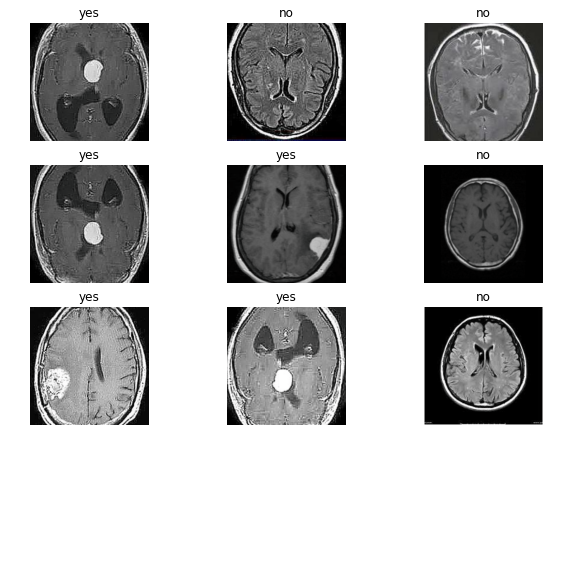

In [5]:
# print(f'Classes: \n {data.classes}')
data.show_batch(nrows=4, figsize=(10,10))

In [6]:
learner = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate], cbs=[ShowGraphCallback()], model_dir="D:\Sw\Python_project\model")

In [7]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=6.309573450380412e-07)

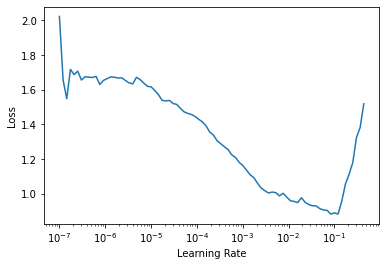

In [7]:
learner.lr_find()

In [8]:
learner.save('D:\Sw\Python_project\working\stage_final1')

Path('D:/Sw/Python_project/working/stage_final1.pth')

In [9]:
learner.load('D:\Sw\Python_project\working\stage_final1')

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.512205,0.154985,0.940000,0.060000,06:46
1,0.262516,0.167372,0.948333,0.051667,06:39
2,0.179098,0.085670,0.968333,0.031667,06:40
3,0.104305,0.074856,0.971667,0.028333,06:41
4,0.071723,0.067402,0.971667,0.028333,06:40
5,0.051763,0.063446,0.975000,0.025000,06:38


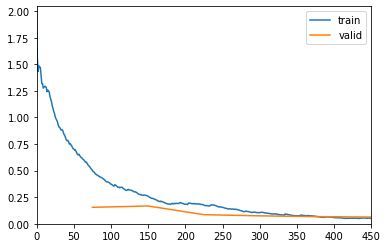

In [10]:
learner.fit_one_cycle(6, lr_max=slice(8e-4), cbs=[ShowGraphCallback()])

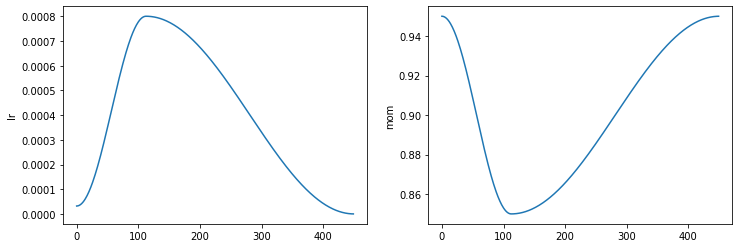

In [11]:
learner.cbs[1].plot_sched()

In [12]:
learner.save('D:\Sw\Python_project\working\stage_final1')

Path('D:/Sw/Python_project/working/stage_final1.pth')

In [8]:
learner.load('D:\Sw\Python_project\working\stage_final1')

In [27]:
learner.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=9.999999747378752e-06)

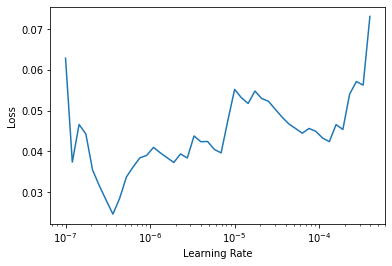

In [21]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.060226,0.018488,0.991667,0.008333,06:52
1,0.060770,0.014819,0.993333,0.006667,06:55
2,0.055209,0.016268,0.991667,0.008333,06:54
3,0.054009,0.017508,0.991667,0.008333,06:54


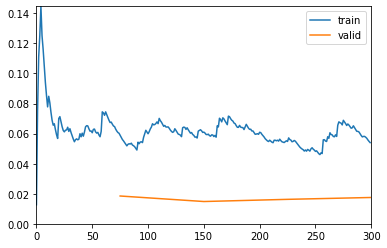

In [9]:
learner.fit_one_cycle(4, lr_max=slice(5e-05), cbs=[ShowGraphCallback()])

In [10]:
learner.save('D:\Sw\Python_project\working\stage_final1111')

Path('D:/Sw/Python_project/working/stage_final1111.pth')

In [11]:
interp = ClassificationInterpretation.from_learner(learner)

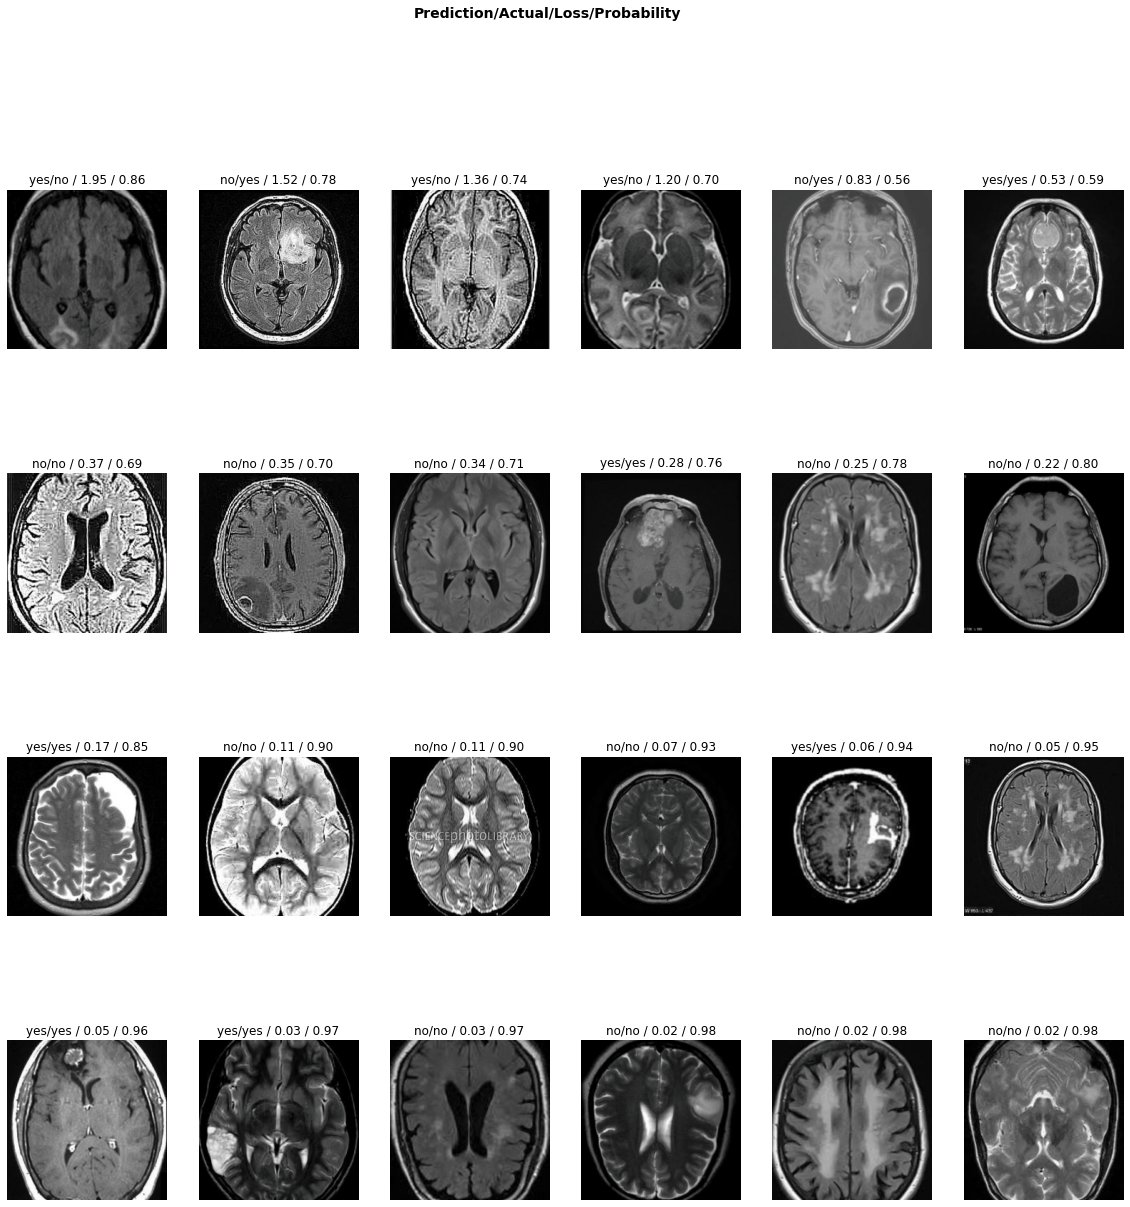

In [12]:
interp.plot_top_losses(24, figsize=(20,20))

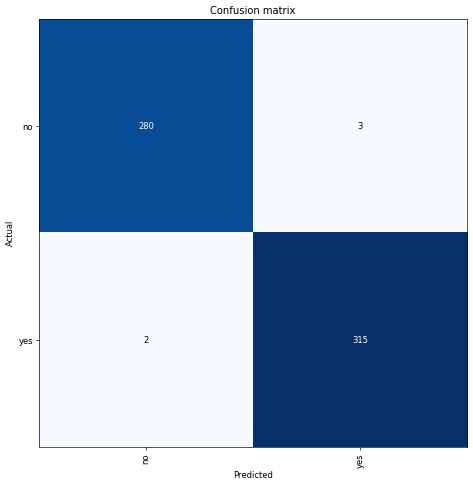

In [13]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)